### Youtube ranking visualization

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('data/유튜브랭킹_20230919.csv')
df.head()

,rank,category,channel,subscriber,view,video
0,1,음악/댄스/가수,BLACKPINK,91300000,33206830000,567
1,2,음악/댄스/가수,BANGTANTV,76400000,21348920000,2330
2,3,음악/댄스/가수,HYBE LABELS,72700000,29979900000,1428
3,4,음악/댄스/가수,SMTOWN,32100000,27856680000,4227
4,5,음악/댄스/가수,JYP Entertainment,27800000,20510660000,1833


- 구독자수 TOP 20 --> barh

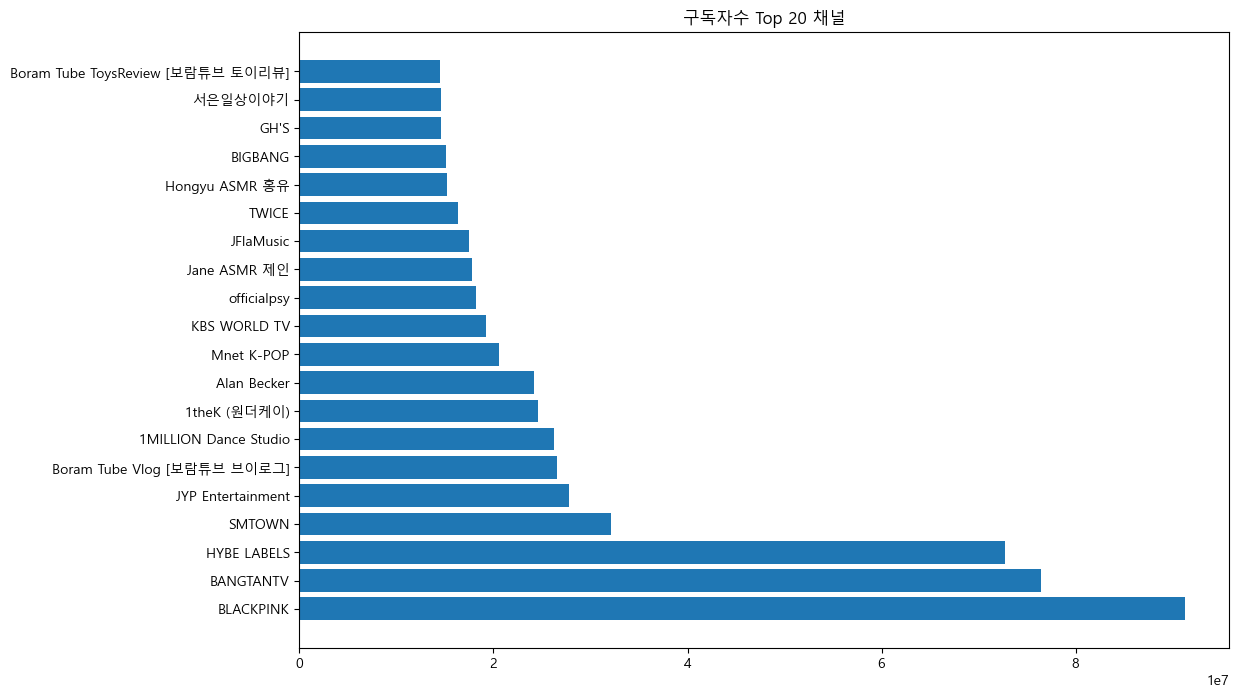

In [6]:
plt.figure(figsize=(12, 8))
plt.barh(df.channel.head(20), df.subscriber.head(20))
plt.title('구독자수 Top 20 채널')
plt.show()

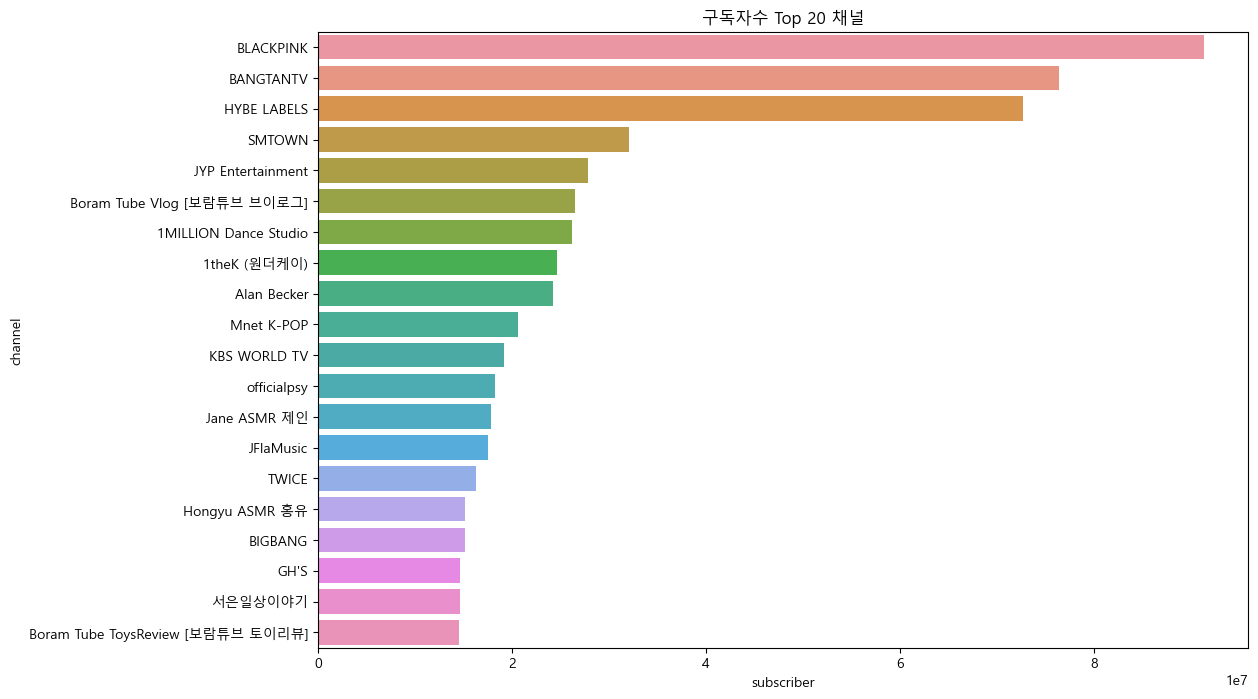

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x='subscriber', y='channel', data=df.head(20))
plt.title('구독자수 Top 20 채널')
plt.show()

- 조회수 TOP 20 채널

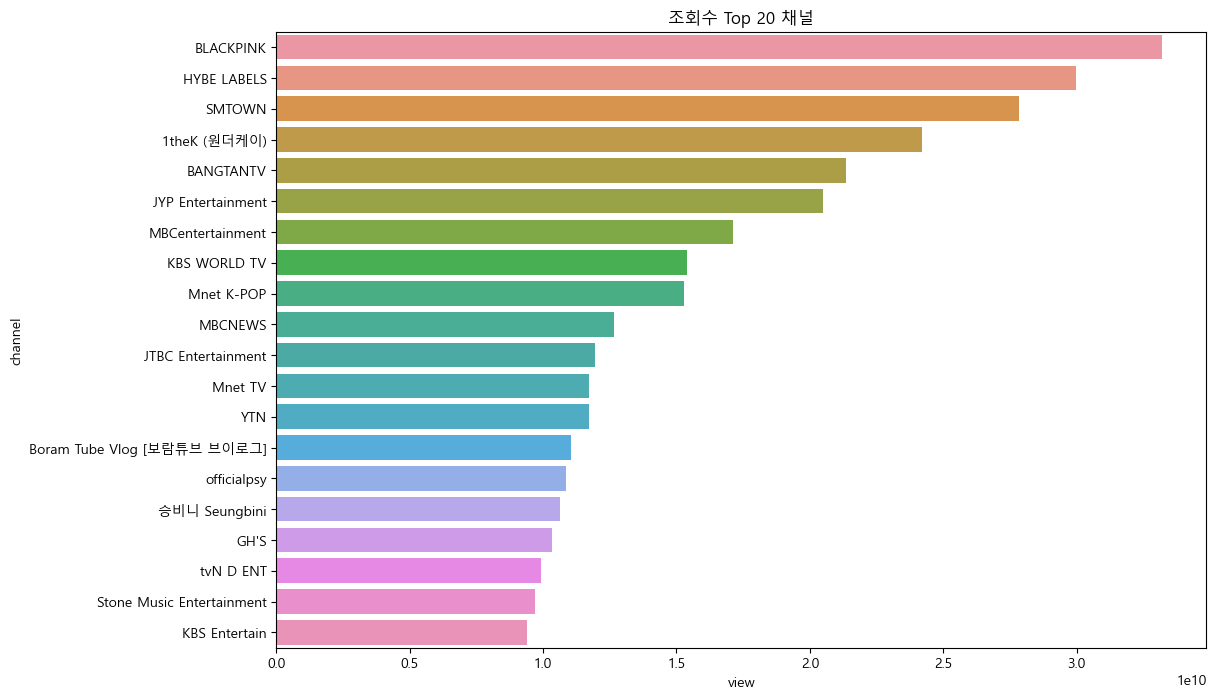

In [11]:
df_view = df.sort_values(by='view', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='view', y='channel', data=df_view.head(20))
plt.title('조회수 Top 20 채널')
plt.show()

- 비디오수 TOP20 채널

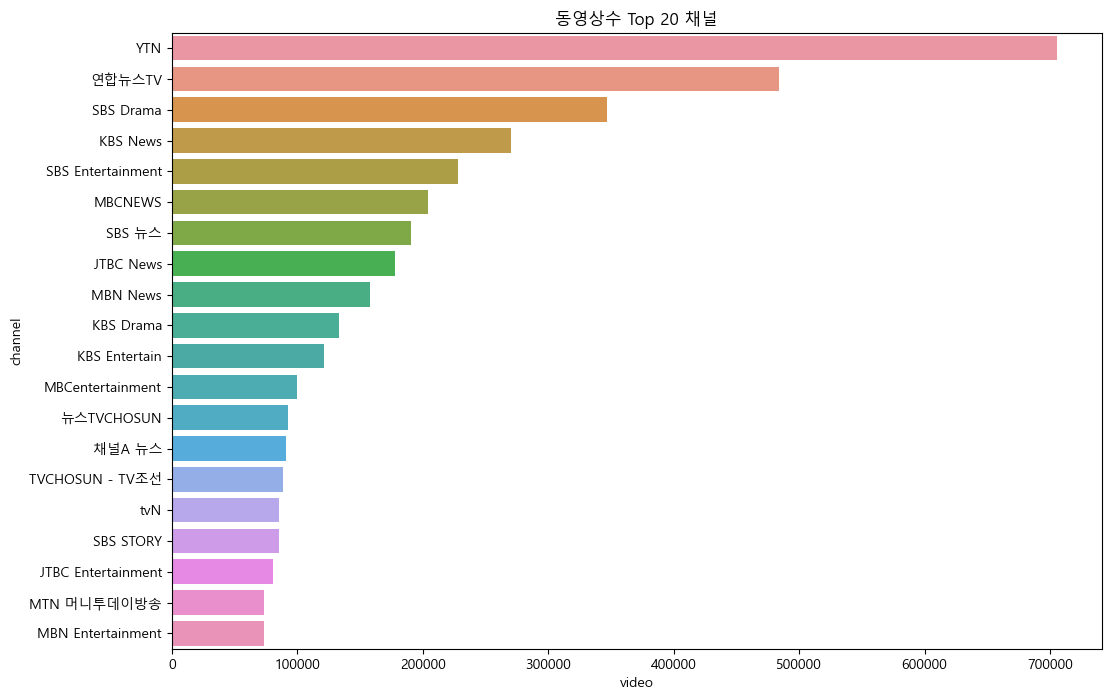

In [12]:
df_video = df.sort_values(by='video', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='video', y='channel', data=df_video.head(20))
plt.title('동영상수 Top 20 채널')
plt.show()

- 카테고리별 채널수

In [15]:
df_cat = df.category.value_counts().to_frame()
df_cat.head(10)

,category
미분류,200
음악/댄스/가수,152
키즈/어린이,131
TV/방송,119
음식/요리/레시피,70
뉴스/정치/사회,58
BJ/인물/연예인,57
게임,51
영화/만화/애니,31
취미/라이프,29


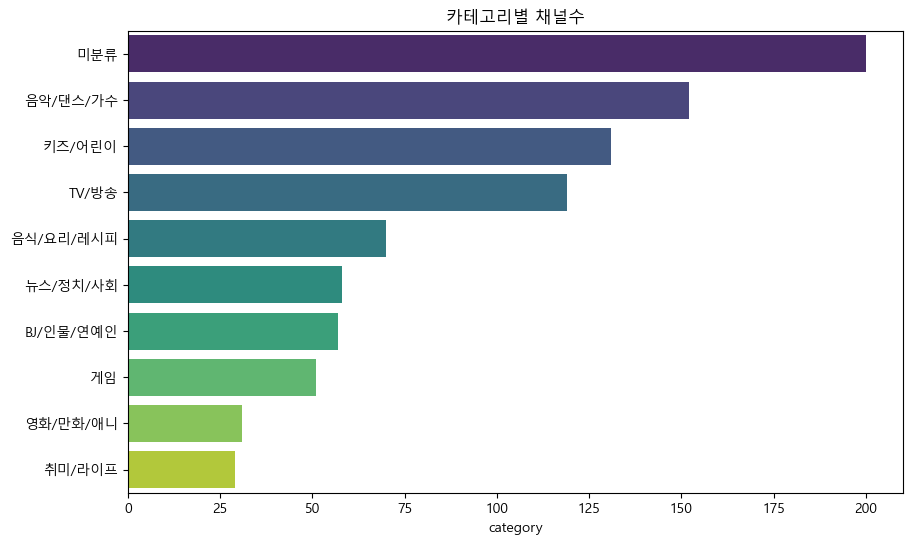

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y=df_cat.index[:10], data=df_cat.head(10), palette='viridis')
plt.title('카테고리별 채널수')
plt.show()

- 카테고리별 평균 구독자수

In [36]:
df.groupby('category')['subscriber'].mean().head()

category
BJ/인물/연예인    1.775965e+06
IT/기술/컴퓨터    1.477143e+06
TV/방송        2.295210e+06
게임           1.377059e+06
교육/강의        1.537778e+06
Name: subscriber, dtype: float64

In [40]:
df_sub_mean = df.pivot_table('subscriber', 'category').sort_values('subscriber', ascending=False)

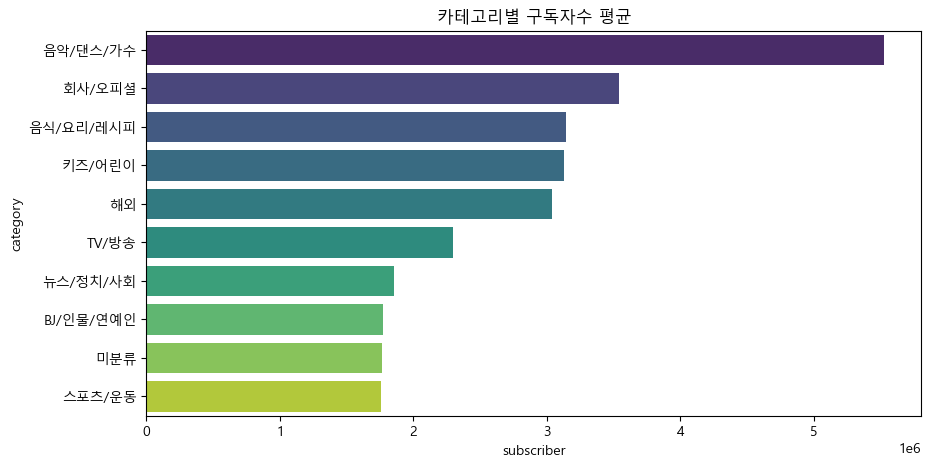

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_sub_mean.head(10), y=df_sub_mean.index[:10], x='subscriber', palette='viridis')
plt.title('카테고리별 구독자수 평균')
plt.show()
